In [27]:
import pandas as pd
import datetime as dt
import numpy as np

In [28]:
online_csv = pd.read_csv('data/cohort_1/online.csv',parse_dates=['InvoiceDate'])
online_csv = online_csv.drop(online_csv.columns[0],axis='columns')
online_csv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [29]:
online_csv['InvoiceMonth']= online_csv['InvoiceDate'].apply(lambda x: dt.datetime(x.year,x.month,1))
online_csv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01


In [30]:
online_csv['CohortMonth'] = online_csv.groupby('CustomerID')['InvoiceMonth'].transform('min')
online_csv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [31]:
# Extract year, month and day integer values

def get_data_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day

In [32]:
invoice_year, invoice_month, _ = get_data_int(online_csv,'InvoiceMonth')
cohort_year, cohort_month, _ = get_data_int(online_csv,'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
online_csv['CohortIndex'] = year_diff * 12 + month_diff +1 # so first month is marked as 1 instead of 0
online_csv.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [33]:
# Count monthly active customers from each cohort
cohort_data = online_csv.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245
...,...,...,...
86,2011-10-01,2,67
87,2011-10-01,3,30
88,2011-11-01,1,291
89,2011-11-01,2,32


In [34]:
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the first month's retention - by definition - will be 100% for all cohorts

    Retention Rate : the percentage of active customers compared to the total number of customers

In [35]:
# Calculate Retention Rate

# Sotre the first column as cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide all values in the cohort_counts by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

# review the retention table
retention.round(3)* 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Other metrics

In [36]:
grouping = online_csv.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
avg_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity').round(1)
avg_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


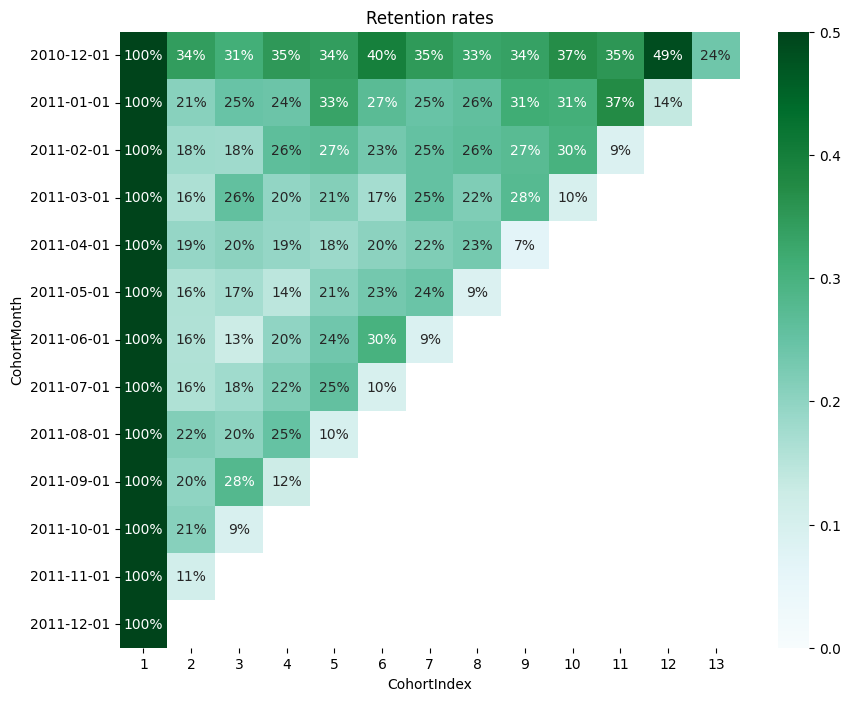

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
retention.index = retention.index.astype('string')
plt.figure(figsize=(10,8))
plt.title('Retention rates')
sns.heatmap(
    data=retention,
    annot=True,
    fmt='.0%',
    vmin=0,
    vmax=0.5,
    cmap='BuGn'
)
plt.show()


### RFM : Behavioral customer segmentation based on three metrics:
- Recency (R) : measures how recent was each customer's last purchase
- Frequency (F) : measures how many purchases the customer has done in the last 12 months
- Monetary Value (M) : how much has the customer spent in the last 12 months.


In [45]:
spend = pd.DataFrame({"CustomerID":[0,1,2,3,4,5,6,7],"Spend":[137,335,172,355,303,233,244,229]})
spend

,CustomerID,Spend
0,0,137
1,1,335
2,2,172
3,3,355
4,4,303
5,5,233
6,6,244
7,7,229


In [48]:
spend['quartiles'] = pd.qcut(spend['Spend'],q=4,labels=range(1,5))
spend.sort_values('Spend')

,CustomerID,Spend,quartiles
0,0,137,1
2,2,172,1
7,7,229,2
5,5,233,2
6,6,244,3
4,4,303,3
1,1,335,4
3,3,355,4


In [58]:
recency = pd.DataFrame({"CustomerID":[0,1,2,3,4,5,6,7],"Recent_Days":[37,235,396,72,255,393,203,133]})
recency

,CustomerID,Recent_Days
0,0,37
1,1,235
2,2,396
3,3,72
4,4,255
5,5,393
6,6,203
7,7,133


In [59]:
# In this case, the label is inverse -  the more recent the customer, the better
# Create numbered labels
labels = list(range(4,0,-1))
labels

[4, 3, 2, 1]

In [62]:
recency['Recency_Quartile'] = pd.qcut(recency['Recent_Days'],q=4,labels=labels)
recency.sort_values('Recent_Days')

,CustomerID,Recent_Days,Recency_Quartile
0,0,37,4
3,3,72,4
7,7,133,3
6,6,203,3
1,1,235,2
4,4,255,2
5,5,393,1
2,2,396,1


In [63]:
rlabels = ['active','lapsed','inactive','churned']
recency['Recency_Quartile'] = pd.qcut(recency['Recent_Days'],q=4,labels=rlabels)
recency.sort_values('Recent_Days')

,CustomerID,Recent_Days,Recency_Quartile
0,0,37,active
3,3,72,active
7,7,133,lapsed
6,6,203,lapsed
1,1,235,inactive
4,4,255,inactive
5,5,393,churned
2,2,396,churned


In [81]:
online_csv['total_sum'] =online_csv['Quantity'] * online_csv['UnitPrice']
online_csv.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,total_sum
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1,2.10


In [ ]:
# convert InvoiceDate from datetime to date
online_csv.InvoiceDate  = online_csv.InvoiceDate.transform(lambda x: x.date())

In [101]:
# Create a hypothetical snapshot day
snap_shot = max(online_csv.InvoiceDate) + dt.timedelta(days=1)
snap_shot

datetime.date(2011, 12, 10)

In [102]:
# Aggregate data on a customer level

datamart = online_csv.groupby('CustomerID').agg({
    
    'InvoiceDate': lambda x: (snap_shot -x.max()).days, # the number of days between hypothetical today and the last transaction
    'InvoiceNo':'count',
    'total_sum':'sum'
    
    })
datamart.rename(columns={
                            'InvoiceDate':"Recency",
                            'InvoiceNo': 'Frequency',
                            'total_sum': 'MonetaryValue'
}, inplace=True)
datamart

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,4,17,268.02
12822,71,9,146.15
...,...,...,...
18280,278,2,38.70
18281,181,2,31.80
18282,8,2,30.70


In [104]:
# Assign Recency Quartile
r_labels = range(4,0,-1)
datamart['R'] = pd.qcut(datamart['Recency'],4,labels=r_labels)
datamart

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12747,3,27,992.82,4
12748,1,967,7522.06,4
12749,4,37,813.45,4
12820,4,17,268.02,4
12822,71,9,146.15,2
...,...,...,...,...
18280,278,2,38.70,1
18281,181,2,31.80,1
18282,8,2,30.70,4


In [105]:
# Assign Frequncy and Monetary Quartiles
f_label = range(1,5)
m_label = range(1,5)
datamart['F'] = pd.qcut(datamart['Frequency'],4,labels=f_label)
datamart['M'] = pd.qcut(datamart['MonetaryValue'],4,labels=m_label)
datamart


,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12747,3,27,992.82,4,4,4
12748,1,967,7522.06,4,4,4
12749,4,37,813.45,4,4,4
12820,4,17,268.02,4,3,3
12822,71,9,146.15,2,2,3
...,...,...,...,...,...,...
18280,278,2,38.70,1,1,1
18281,181,2,31.80,1,1,1
18282,8,2,30.70,4,1,1


In [109]:
# Concatenate RFM quartile values to RFM_Segment
# Sum RFM quartiles values to RFM_Score
def join_rfm(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

datamart['RFM_Segment'] = datamart.apply(join_rfm,axis='columns')
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment
CustomerID,,,,,,,
12747,3,27,992.82,4,4,4,444
12748,1,967,7522.06,4,4,4,444
12749,4,37,813.45,4,4,4,444
12820,4,17,268.02,4,3,3,433
12822,71,9,146.15,2,2,3,223
...,...,...,...,...,...,...,...
18280,278,2,38.70,1,1,1,111
18281,181,2,31.80,1,1,1,111
18282,8,2,30.70,4,1,1,411


In [110]:
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis='columns')
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,3,27,992.82,4,4,4,444,12
12748,1,967,7522.06,4,4,4,444,12
12749,4,37,813.45,4,4,4,444,12
12820,4,17,268.02,4,3,3,433,10
12822,71,9,146.15,2,2,3,223,7
...,...,...,...,...,...,...,...,...
18280,278,2,38.70,1,1,1,111,3
18281,181,2,31.80,1,1,1,111,3
18282,8,2,30.70,4,1,1,411,6


In [114]:
# Analyzing RFM table
# Largest RFM segments
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[0:10]

RFM_Segment
444    379
111    345
344    165
211    165
233    131
222    130
311    128
333    124
122    116
433    114
dtype: int64

It is always the best practice to investigate the size of the segments before you use them for targeting or other business applications.

In [115]:
# Filtering on RFM segments
datamart.loc[datamart.RFM_Segment=='111'][:5]

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12837,174,2,10.55,1,1,1,111,3
12852,295,2,32.55,1,1,1,111,3
12902,265,4,42.03,1,1,1,111,3
12922,162,4,57.24,1,1,1,111,3
12929,312,3,42.90,1,1,1,111,3


In [118]:
# Summary metrics per RFM score
datamart.groupby('RFM_Score').agg({'Recency':'mean',
                                    'Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           257.6       2.0          28.6   345
4           177.8       3.2          48.0   343
5           144.2       4.3          78.6   414
6           105.8       6.4         149.2   434
7            83.3       8.9         163.7   385
8            63.8      12.9         196.2   381
9            49.1      16.7         330.9   348
10           33.6      24.8         442.7   363
11           22.0      39.2         715.1   309
12            8.1      77.2        1715.5   379

As you can see, the sizes are fairly similar across the RFM score groups, and each of the RFM values are better with the higher RFM Score segment.

In [120]:
# Grouping into named segments : Gold, Silver, Bronze segments

def segments(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif df['RFM_Score'] >= 5 and df['RFM_Score'] <9:
        return 'Silver'
    else:
        return 'Bronze'

In [125]:
datamart['General_Segment'] = datamart.apply(segments,axis='columns')
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12747,3,27,992.82,4,4,4,444,12,Gold
12748,1,967,7522.06,4,4,4,444,12,Gold
12749,4,37,813.45,4,4,4,444,12,Gold
12820,4,17,268.02,4,3,3,433,10,Gold
12822,71,9,146.15,2,2,3,223,7,Silver
...,...,...,...,...,...,...,...,...,...
18280,278,2,38.70,1,1,1,111,3,Bronze
18281,181,2,31.80,1,1,1,111,3,Bronze
18282,8,2,30.70,4,1,1,411,6,Silver


In [139]:
datamart.groupby('General_Segment').agg({'Recency':'mean',
                                    'Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).sort_values(by=('Recency','mean')).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Gold               28.0      40.2         819.9  1399
Silver            100.4       8.0         145.6  1614
Bronze            217.8       2.6          38.3   688

### Data pre-processing for k-means clustering
run k-means clustering on RFM numbers and identify customer segments

### Key k-means assumptions
- Symmetric distribution of variables(not skewed)
- Variables with same average values - ensuring that each metric get an equal weight in the k-means calculation
- Variables with same variance ( to scale the variance of each variable to the same levels)

### Skewed Variables
- Skewness is best managed by applying a logarithmic transformation to each of the skewed variables (log transformation works only on positive values)

In [140]:
datamart.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,94.830316,19.147257,380.535069,7.439341
std,99.969238,44.831615,1474.285937,2.820851
min,1.000000,1.000000,0.650000,3.000000
25%,19.000000,4.000000,59.400000,5.000000
50%,53.000000,9.000000,140.300000,7.000000
75%,152.000000,21.000000,337.800000,10.000000
max,374.000000,1532.000000,59596.070000,12.000000


    Here we see that both the average values as well as standard deviations are different between the three variables

### Exploring distribution

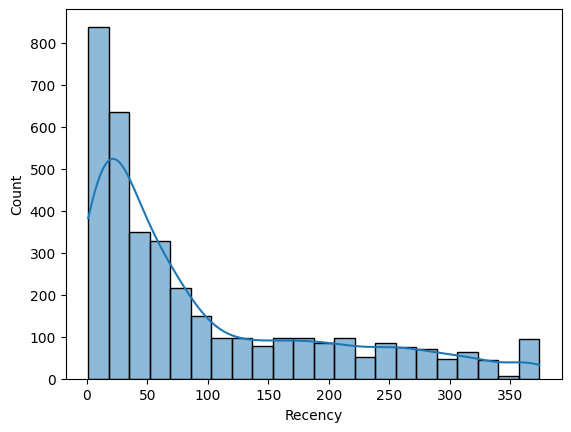

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(datamart['Recency'],kde=True)
plt.show()

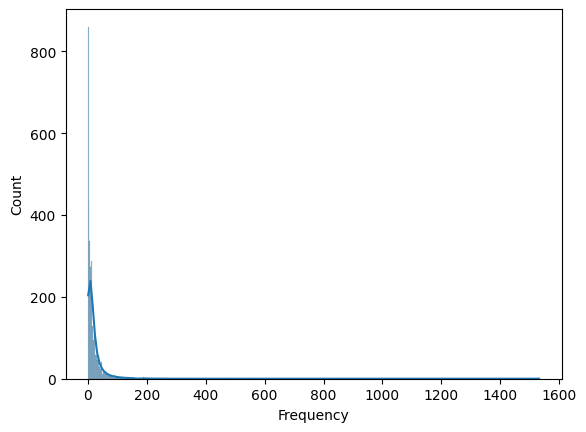

In [154]:
sns.histplot(datamart['Frequency'],kde=True)
plt.show()

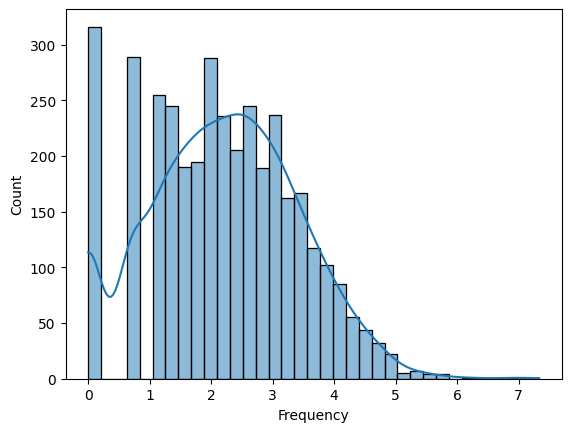

In [155]:
# log transformation
frequency_log = np.log(datamart['Frequency'])
sns.histplot(frequency_log,kde=True)
plt.show()

Although it's not perfectly symmetrical, it has very little skewness compared to the original distribution

### Dealing with negative values
- Adding a constant before log transformation
    - The best practice is to add the absolute value of the lowest negative to each observation, and then a small constant like 1

/var/folders/wj/b4h4w1f97bs9bhrqtx86sr4w0000gn/T/ipykernel_50750/3845519400.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3,1, 1); sns.distplot(datamart['Frequency'])
/var/folders/wj/b4h4w1f97bs9bhrqtx86sr4w0000gn/T/ipykernel_50750/3845519400.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subpl

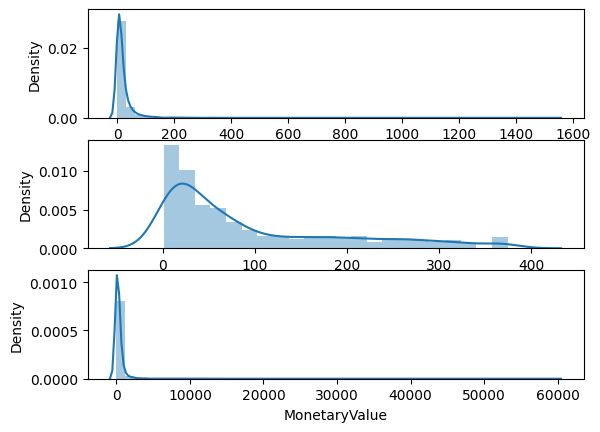

In [162]:
# Plot distribution of var1
plt.subplot(3,1, 1); sns.distplot(datamart['Frequency'])

# Plot distribution of var2
plt.subplot(3,1, 2); sns.distplot(datamart['Recency'])

# Plot distribution of var3
plt.subplot(3, 1,3); sns.distplot(datamart['MonetaryValue'])

# Show the plot
plt.show()

/var/folders/wj/b4h4w1f97bs9bhrqtx86sr4w0000gn/T/ipykernel_50750/3789476808.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(datamart['Frequency_log'])
/var/folders/wj/b4h4w1f97bs9bhrqtx86sr4w0000gn/T/ipykernel_50750/3789476808.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  pl

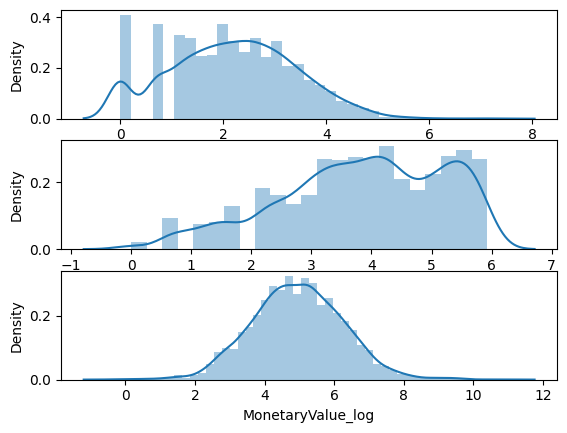

In [163]:
# Apply log transformation to Frequency
datamart['Frequency_log'] = np.log(datamart['Frequency'])

# Apply log transformation to Recency
datamart['Recency_log'] = np.log(datamart['Recency'])

# Apply log transformation to MonetaryValue
datamart['MonetaryValue_log'] = np.log(datamart['MonetaryValue'])

# Create a subplot of the distribution of Frequency_log
plt.subplot(3, 1, 1); sns.distplot(datamart['Frequency_log'])

# Create a subplot of the distribution of Recency_log
plt.subplot(3, 1, 2); sns.distplot(datamart['Recency_log'])

# Create a subplot of the distribution of MonetaryValue_log
plt.subplot(3, 1, 3); sns.distplot(datamart['MonetaryValue_log'])

# Show the plot
plt.show()

### Centering and Scaling data

In [165]:
datamart[['Recency','Frequency','MonetaryValue']].describe()

,Recency,Frequency,MonetaryValue
count,3701.000000,3701.000000,3701.000000
mean,94.830316,19.147257,380.535069
std,99.969238,44.831615,1474.285937
min,1.000000,1.000000,0.650000
25%,19.000000,4.000000,59.400000
50%,53.000000,9.000000,140.300000
75%,152.000000,21.000000,337.800000
max,374.000000,1532.000000,59596.070000


each of the three variables has both a different average value and a different standard deviation

In [166]:
# K-means works well on variables with the same mean
# Centering variables is done by substracting average value from each observation
datamart_rfm = datamart[['Recency','Frequency','MonetaryValue']]

datamart_centered = datamart_rfm - datamart_rfm.mean()
datamart_centered.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3701.00,3701.00,3701.00
mean,-0.00,-0.00,0.00
std,99.97,44.83,1474.29
min,-93.83,-18.15,-379.89
25%,-75.83,-15.15,-321.14
50%,-41.83,-10.15,-240.24
75%,57.17,1.85,-42.74
max,279.17,1512.85,59215.53


In [167]:
# K-means works better on variables with the same variance / standard deviation
# Scaling variables is done by dividing them by standard deviation of each
datamart_scaled = datamart_rfm/datamart_rfm.std()
datamart_scaled.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3701.00,3701.00,3701.00
mean,0.95,0.43,0.26
std,1.00,1.00,1.00
min,0.01,0.02,0.00
25%,0.19,0.09,0.04
50%,0.53,0.20,0.10
75%,1.52,0.47,0.23
max,3.74,34.17,40.42


### Combining centering and scaling
- Substract mean and divide by standard deviation manually
- Or use a scaler from scikit-learn library (returns numpy.ndarrary object)

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)
print('mean: ',datamart_normalized.mean(axis=0).round(2))
print('std: ',datamart_normalized.std(axis=0).round(2))

mean:  [-0.  0.  0.]
std:  [1. 1. 1.]


In [183]:
datamart_normalized = pd.DataFrame(datamart_normalized,index = datamart_rfm.index, columns = datamart_rfm.columns)
datamart_normalized

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,-0.918710,0.175184,0.415366
12748,-0.938719,21.145364,4.844711
12749,-0.908705,0.398272,0.293683
12820,-0.908705,-0.047903,-0.076329
12822,-0.238409,-0.226372,-0.159004
...,...,...,...
18280,1.832508,-0.382533,-0.231896
18281,0.862078,-0.382533,-0.236577
18282,-0.868688,-0.382533,-0.237323


In [176]:
""" # Center the data by subtracting average values from each entry
data_centered = data - data.mean()

# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2)) """

' # Center the data by subtracting average values from each entry\ndata_centered = data - data.mean()\n\n# Scale the data by dividing each entry by standard deviation\ndata_scaled = data / data.std()\n\n# Normalize the data by applying both centering and scaling\ndata_normalized = (data - data.mean()) / data.std()\n\n# Print summary statistics to make sure average is zero and standard deviation is one\nprint(data_normalized.describe().round(2)) '

In [185]:
datamart_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3701.00,3701.00,3701.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-0.94,-0.40,-0.26
25%,-0.76,-0.34,-0.22
50%,-0.42,-0.23,-0.16
75%,0.57,0.04,-0.03
max,2.79,33.75,40.17


### Preprocessing pipeline
- Log transformation only works with positive data
- Normalization forces data to have negative values and log will not work
1. unskew the data - log transformation
2. standardize to the same average values
3. scale to the same standard deviation
4. store as a separate array to be used for clustering
    - after done with clustering, we will come back to the original values to calculate stats for each of the clusters based on raw values



In [186]:
# unskew the data
datamart_log = np.log(datamart_rfm)

# Normalize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)

# store for clustering
datamart_normalized = scaler.transform(datamart_log)

In [187]:
datamart_normalized

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,-0.918710,0.175184,0.415366
12748,-0.938719,21.145364,4.844711
12749,-0.908705,0.398272,0.293683
12820,-0.908705,-0.047903,-0.076329
12822,-0.238409,-0.226372,-0.159004
...,...,...,...
18280,1.832508,-0.382533,-0.231896
18281,0.862078,-0.382533,-0.236577
18282,-0.868688,-0.382533,-0.237323


### K-means implementations
- methods to define the number of clusters
    - Visual methods - elbow criterion
    - Mathematical methods - silhouette coefficent
    - Each solution's interpretation should make sense for the business first and be actionable

In [188]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=1)

# Compute K-means clustering on pre-processing data
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_attribute
cluster_labels = kmeans.labels_

- Analysing average RFM values of each cluster

In [189]:
# Create a cluster label column in the original DataFrame
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels)
datamart_rfm_k2

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,3,27,992.82,1
12748,1,967,7522.06,1
12749,4,37,813.45,1
12820,4,17,268.02,1
12822,71,9,146.15,1
...,...,...,...,...
18280,278,2,38.70,0
18281,181,2,31.80,0
18282,8,2,30.70,1


In [190]:
# Calculate average RFM values and size for each cluster
datamart_rfm_k2.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         243.0       6.0         108.0   978
1          42.0      24.0         478.0  2723

 The result of a simple 2-cluster solution: It's clear that segment 0 has customers who have not been very recent, are much less frequent with their purchases and their monetary value is much lower than that of segment 1.

### Elbow criterion method
- the elblow method plots the sum of squared errors for each number of segments: It is the sum of squared distances from each data point to their cluster center
 - Plot the number of clusters against within-cluster sum-of-squared-errors(SSE) - sum of sqaured distances from every data point to their cluster center
 - identify an 'elbow' in the plot
 - Elbow - a point representing an 'optimal' number of clusters


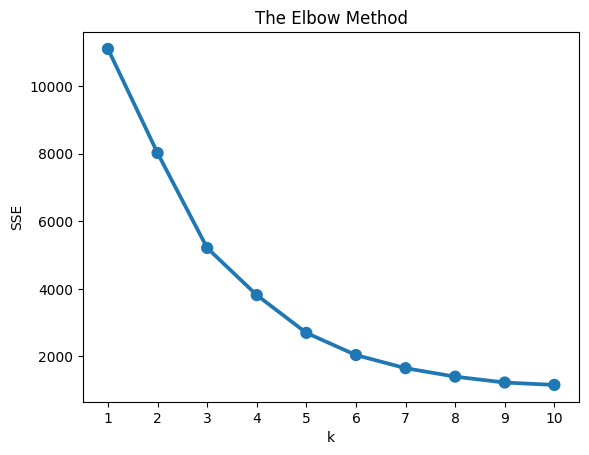

In [191]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closet cluster center


# plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

The point at 4 Clusters is where we identify the largest angle, and this is the elbow we've been looking for.

### Profile and interpret segments
- Approaches to build customer personas
    - Summary stats for each cluster e.g. average RFM values
        - Run k-means segmentation for several k values around the recommended value
        - Create a cluster label column in the original DataFrame: data_rfm_k2 = data_rfm.assign(Cluster = cluster_labels)
        - Calculate average RFM values and sizes for each cluster
        - Compare average RFM values of each clustering solution
    - Snake plots: a chart that visualizes RFM values between the segments
    - Relative importance of cluster attributes compared to population


1. Snake plots to understand and compare segments
- Market research technique to compare different segments
- Visual representation of each segment's attributes
- Need to first normalize data (center & scale)
- plot each cluster's average normalized values of each attribute

2. Prepare data for a snake plot
- Transform datamart_normalized as DataFrame and add a Cluster column
- Melt the data into a long format so RFM values and metric names are store in 1 column each

In [200]:
# unskew the data
datamart_log = np.log(datamart_rfm)

# Normalize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)

# store for clustering
datamart_normalized = scaler.transform(datamart_log)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1)

# Compute K-means clustering on pre-processing data
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_attribute
cluster_labels = kmeans.labels_

datamart_normalized = pd.DataFrame(datamart_normalized,index = datamart_rfm.index, columns = datamart_rfm.columns)

datamart_rfm_k3 = datamart_rfm.assign(Cluster = cluster_labels)

datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']
datamart_normalized

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-2.004857,0.909521,1.482882,1
12748,-2.808441,3.845050,3.022433,1
12749,-1.794431,1.168000,1.331390,1
12820,-1.794431,0.530005,0.487337,1
12822,0.309509,0.008268,0.026297,2
...,...,...,...,...
18280,1.307900,-1.225610,-0.983925,0
18281,0.994016,-1.225610,-1.133219,0
18282,-1.287427,-1.225610,-1.159983,0


We basically melt the three RFM columns and create one called attribute, the attribute column will store the name of the metric, and then store its value into another column.

In [201]:
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                        id_vars = ['CustomerID','Cluster'],
                        value_vars = ['Recency','Frequency','MonetaryValue'],
                        var_name = 'Attribute',
                        value_name = 'Value'

)
datamart_melt

,CustomerID,Cluster,Attribute,Value
0,12747,1,Recency,-2.004857
1,12748,1,Recency,-2.808441
2,12749,1,Recency,-1.794431
3,12820,1,Recency,-1.794431
4,12822,2,Recency,0.309509
...,...,...,...,...
11098,18280,0,MonetaryValue,-0.983925
11099,18281,0,MonetaryValue,-1.133219
11100,18282,0,MonetaryValue,-1.159983
11101,18283,1,MonetaryValue,0.851890


<AxesSubplot: title={'center': 'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

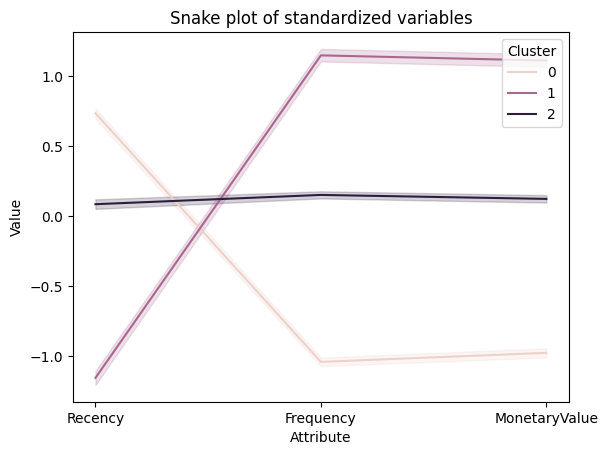

In [202]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x='Attribute',y='Value',hue='Cluster',data=datamart_melt)

In [204]:
datamart_rfm_k3

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,3,27,992.82,1
12748,1,967,7522.06,1
12749,4,37,813.45,1
12820,4,17,268.02,1
12822,71,9,146.15,2
...,...,...,...,...
18280,278,2,38.70,0
18281,181,2,31.80,0
18282,8,2,30.70,0


In [205]:
datamart_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,4,17,268.02
12822,71,9,146.15
...,...,...,...
18280,278,2,38.70
18281,181,2,31.80
18282,8,2,30.70


Relative importance of segment attributes
- Useful technique to identify relative importance of each segment's attribute
- Calculate average values of each cluster
- Calculate average values of population
- Calculate importance score by dividing them and substract 1 (ensures 0 is returned when cluster average equals population average)

In [207]:
cluster_avg = datamart_rfm_k3.groupby('Cluster').mean()
population_avg = datamart_rfm.mean()
rel_imp = cluster_avg/population_avg -1
rel_imp

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.830626,-0.837039,-0.855502
1,-0.836870,1.706698,1.898413
2,-0.165038,-0.314838,-0.407644


As a ratio moves away from 0, attribute importance for a segment (relative to total pop) increases.

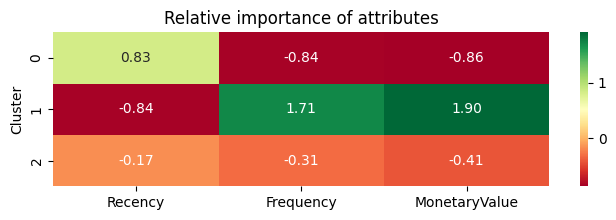

In [208]:
plt.figure(figsize=(8,2))
plt.title('Relative importance of attributes')
sns.heatmap(data = rel_imp, annot =True,fmt='.2f',cmap='RdYlGn')
plt.show()

### END TO END Segmentation

In [210]:
datamart_rfmt = pd.read_csv('data/cohort_4/datamart_rfmt.csv',index_col='CustomerID')
datamart_rfmt

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12747,3,25,948.70,362
12748,1,888,7046.16,365
12749,4,37,813.45,214
12820,4,17,268.02,327
12822,71,9,146.15,88
...,...,...,...,...
18280,278,2,38.70,278
18281,181,2,31.80,181
18282,8,2,30.70,8


In [211]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)

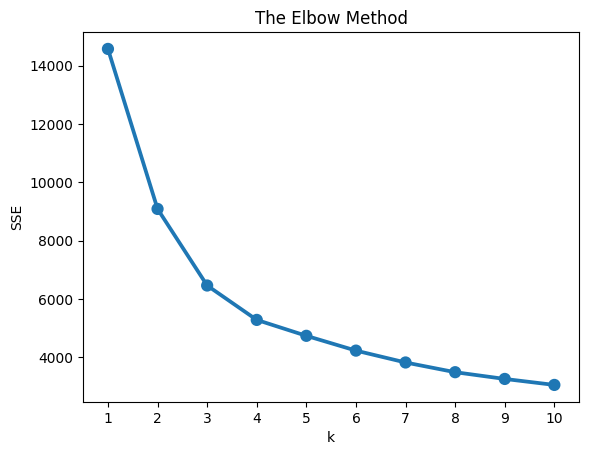

In [213]:
sse ={}
# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1 ).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Build 4-Cluster solution

In [214]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          13.5      53.7        1142.8  279.6   777
1          33.0       7.2         101.0   45.2   750
2          89.0      15.0         276.7  247.5  1204
3         205.0       3.3          58.7  222.8   912